# A Comprehensive Analysis of Suicides Dataset.
## <a href = 'https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016'> Download Dataset from kaggle </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
suicide_data = pd.read_csv('suicide data 1985-2016.csv')
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


##  By looking data I found `country-year` and `HDI for year` not useful for our analysis. so, lets drop it.

In [4]:
suicide_data.drop(['country-year','HDI for year'], axis = 1, inplace = True)

In [5]:
suicide_data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers


# Worldwide Analysis

In [6]:
year_group = suicide_data.groupby('year')

In [7]:
years = suicide_data.year.unique()
years.sort()

In [8]:
world_suicides_per_100k_pop = ((year_group.suicides_no.sum()) / (year_group.population.sum())) *100000

In [9]:
worldwide_total_suicide_by_year = year_group['suicides_no'].agg('sum')

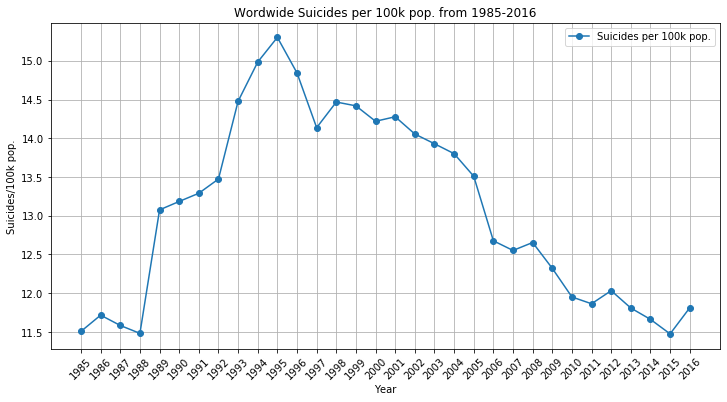

In [10]:
fig = plt.figure(figsize = (12,6))
plt.plot(years, world_suicides_per_100k_pop, marker = 'o', label = 'Suicides per 100k pop.')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Suicides per 100k pop. from 1985-2016')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop from 1985-2016')

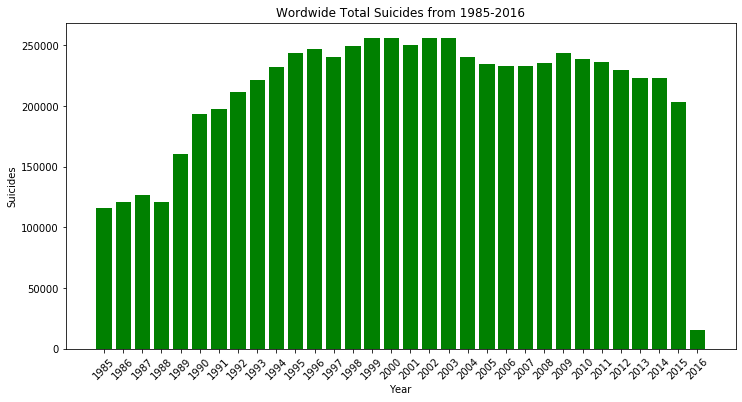

In [11]:
fig = plt.figure(figsize = (12,6))
plt.bar(years, worldwide_total_suicide_by_year, color = 'g')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Wordwide Total Suicides from 1985-2016')
plt.show()
fig.savefig('Wordwide Total Suicides from 1985-2016')

In [12]:
male_group = suicide_data[suicide_data['sex']=='male'].groupby('year')
female_group = suicide_data[suicide_data['sex']=='female'].groupby('year')

In [13]:
world_male_suicides_per_100k_pop = (male_group['suicides_no'].sum()) / (male_group['population'].sum())*100000
world_female_suicides_per_100k_pop = (female_group['suicides_no'].sum()) / (female_group['population'].sum())*100000

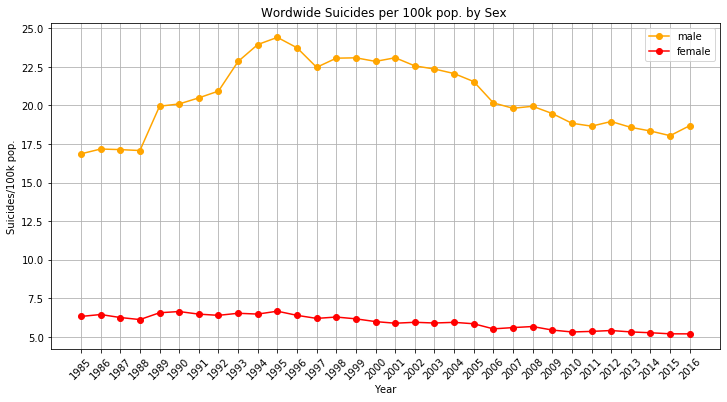

In [14]:
fig = plt.figure(figsize = (12,6))
plt.plot(years, world_male_suicides_per_100k_pop, marker = 'o', label = 'male', color = 'orange')
plt.plot(years, world_female_suicides_per_100k_pop, marker = 'o', label = 'female', color = 'red')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Suicides per 100k pop. by Sex ')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop by Sex')

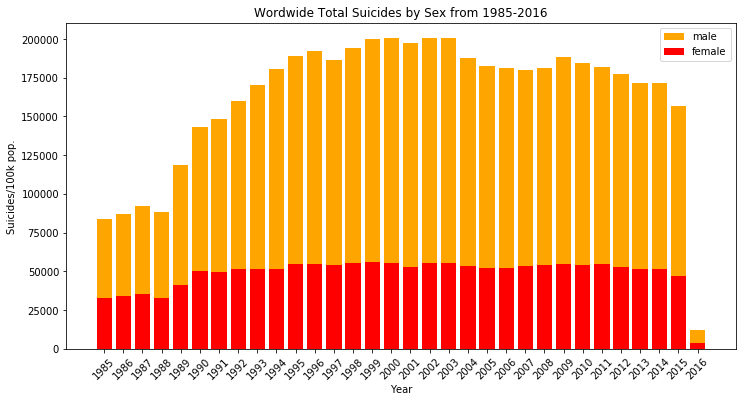

In [15]:
fig = plt.figure(figsize = (12,6))
plt.bar(years, male_group['suicides_no'].sum(), label = 'male', color = 'orange')
plt.bar(years, female_group['suicides_no'].sum(), label = 'female', color = 'red')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Total Suicides by Sex from 1985-2016')
plt.legend()
plt.show()
fig.savefig('Wordwide Total Suicides by Sex from 1985-2016' )

In [16]:
male_perc_by_year = (male_group['suicides_no'].sum() / year_group.suicides_no.sum())*100
female_perc_by_year = (female_group['suicides_no'].sum() / year_group.suicides_no.sum())*100

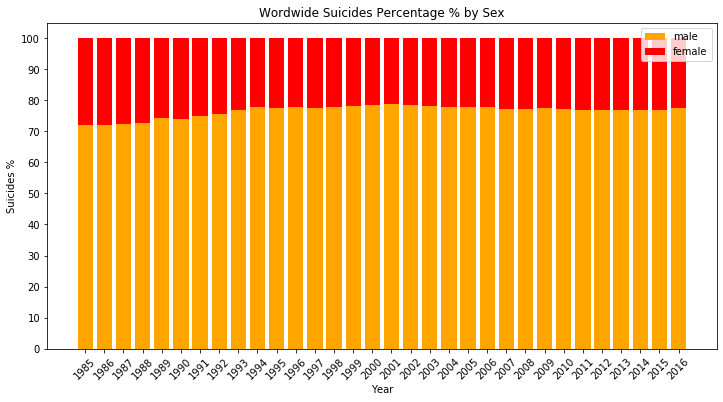

In [17]:
fig = plt.figure(figsize = (12,6))
plt.bar(years, male_perc_by_year, label = 'male', color = 'orange')
plt.bar(years, female_perc_by_year, label = 'female', color = 'red', bottom= np.array(male_perc_by_year))
plt.xticks(years, rotation = 45)
plt.yticks(np.arange(0,110,10))
plt.xlabel('Year')
plt.ylabel('Suicides %')
plt.title('Wordwide Suicides Percentage % by Sex')
plt.legend()
plt.show()
fig.savefig('Wordwide Suicides Percentage % by Sex')

In [18]:
suicide_data.age.value_counts()

75+ years      4642
15-24 years    4642
55-74 years    4642
35-54 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [19]:
world_5_14_age_group = suicide_data[suicide_data['age']=='5-14 years'].groupby('year')
world_15_24_age_group = suicide_data[suicide_data['age']=='15-24 years'].groupby('year')
world_25_34_age_group = suicide_data[suicide_data['age']=='25-34 years'].groupby('year')
world_35_54_age_group = suicide_data[suicide_data['age']=='35-54 years'].groupby('year')
world_55_74_age_group = suicide_data[suicide_data['age']=='55-74 years'].groupby('year')
world_75_above_age_group = suicide_data[suicide_data['age']=='75+ years'].groupby('year')

In [20]:
a = ((world_5_14_age_group.suicides_no.sum()) / (world_5_14_age_group.population.sum()))*100000
b = (world_15_24_age_group.suicides_no.sum() / (world_15_24_age_group.population.sum()))*100000
c = (world_25_34_age_group.suicides_no.sum() / (world_25_34_age_group.population.sum()))*100000
d = (world_35_54_age_group.suicides_no.sum() / (world_35_54_age_group.population.sum()))*100000
e = (world_55_74_age_group.suicides_no.sum() / (world_55_74_age_group.population.sum()))*100000
f = (world_75_above_age_group.suicides_no.sum() / (world_75_above_age_group.population.sum()))*100000

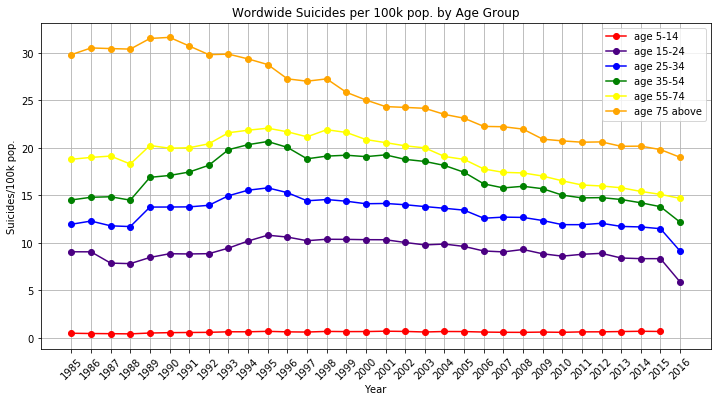

In [21]:
fig = plt.figure(figsize = (12,6))
plt.plot(a, label = 'age 5-14', color = 'red', marker = 'o')
plt.plot(b, label = 'age 15-24', color = 'indigo', marker = 'o')
plt.plot(c, label = 'age 25-34', color = 'blue', marker = 'o')
plt.plot(d, label = 'age 35-54', color = 'green', marker = 'o')
plt.plot(e, label = 'age 55-74', color = 'yellow', marker = 'o')
plt.plot(f, label = 'age 75 above', color = 'orange', marker = 'o')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Suicides per 100k pop. by Age Group')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop by Age Group')

In [22]:
suicide_data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [23]:
world_x_gen_group = suicide_data[suicide_data['generation']=='Generation X'].groupby('year')
world_silent_gen_group = suicide_data[suicide_data['generation']=='Silent'].groupby('year')
world_millenials_gen_group = suicide_data[suicide_data['generation']=='Millenials'].groupby('year')
world_boomers_gen_group = suicide_data[suicide_data['generation']=='Boomers'].groupby('year')
world_gi_gen_group = suicide_data[suicide_data['generation']=='G.I. Generation'].groupby('year')
world_z_gen_group = suicide_data[suicide_data['generation']=='Generation Z'].groupby('year')

In [24]:
g = (world_x_gen_group.suicides_no.sum() / world_x_gen_group.population.sum())*100000
h = (world_silent_gen_group.suicides_no.sum() / world_silent_gen_group.population.sum())*100000
i = (world_millenials_gen_group.suicides_no.sum() / world_millenials_gen_group.population.sum())*100000
j = (world_boomers_gen_group.suicides_no.sum() / world_boomers_gen_group.population.sum())*100000
k = (world_gi_gen_group.suicides_no.sum() / world_gi_gen_group.population.sum())*100000
l = (world_z_gen_group.suicides_no.sum() / world_z_gen_group.population.sum())*100000

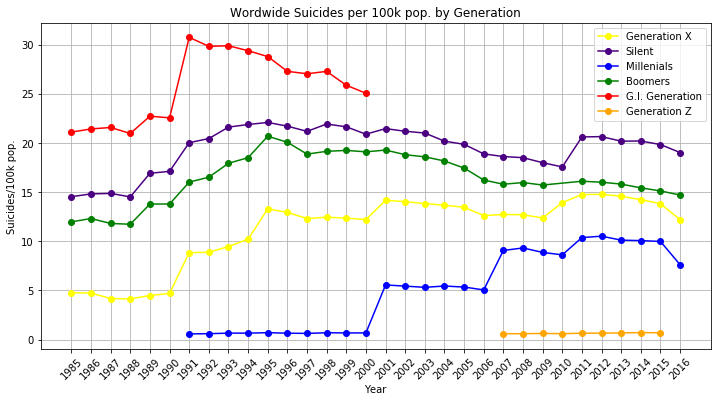

In [25]:
fig = plt.figure(figsize = (12,6))
plt.plot(g, label = 'Generation X', color = 'yellow', marker = 'o')
plt.plot(h, label = 'Silent', color = 'indigo', marker = 'o')
plt.plot(i, label = 'Millenials', color = 'blue', marker = 'o')
plt.plot(j, label = 'Boomers', color = 'green', marker = 'o')
plt.plot(k, label = 'G.I. Generation', color = 'red', marker = 'o')
plt.plot(l, label = 'Generation Z', color = 'orange', marker = 'o')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Suicides per 100k pop. by Generation')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop by Generation')

# Countriwise Analysis

In [26]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [27]:
country_group = suicide_data.groupby('country')

In [28]:
country_suicides_per_100k_pop = (country_group['suicides_no'].sum() / country_group['population'].sum())*100000
country_suicides_per_100k_pop.sort_values(  inplace = True)

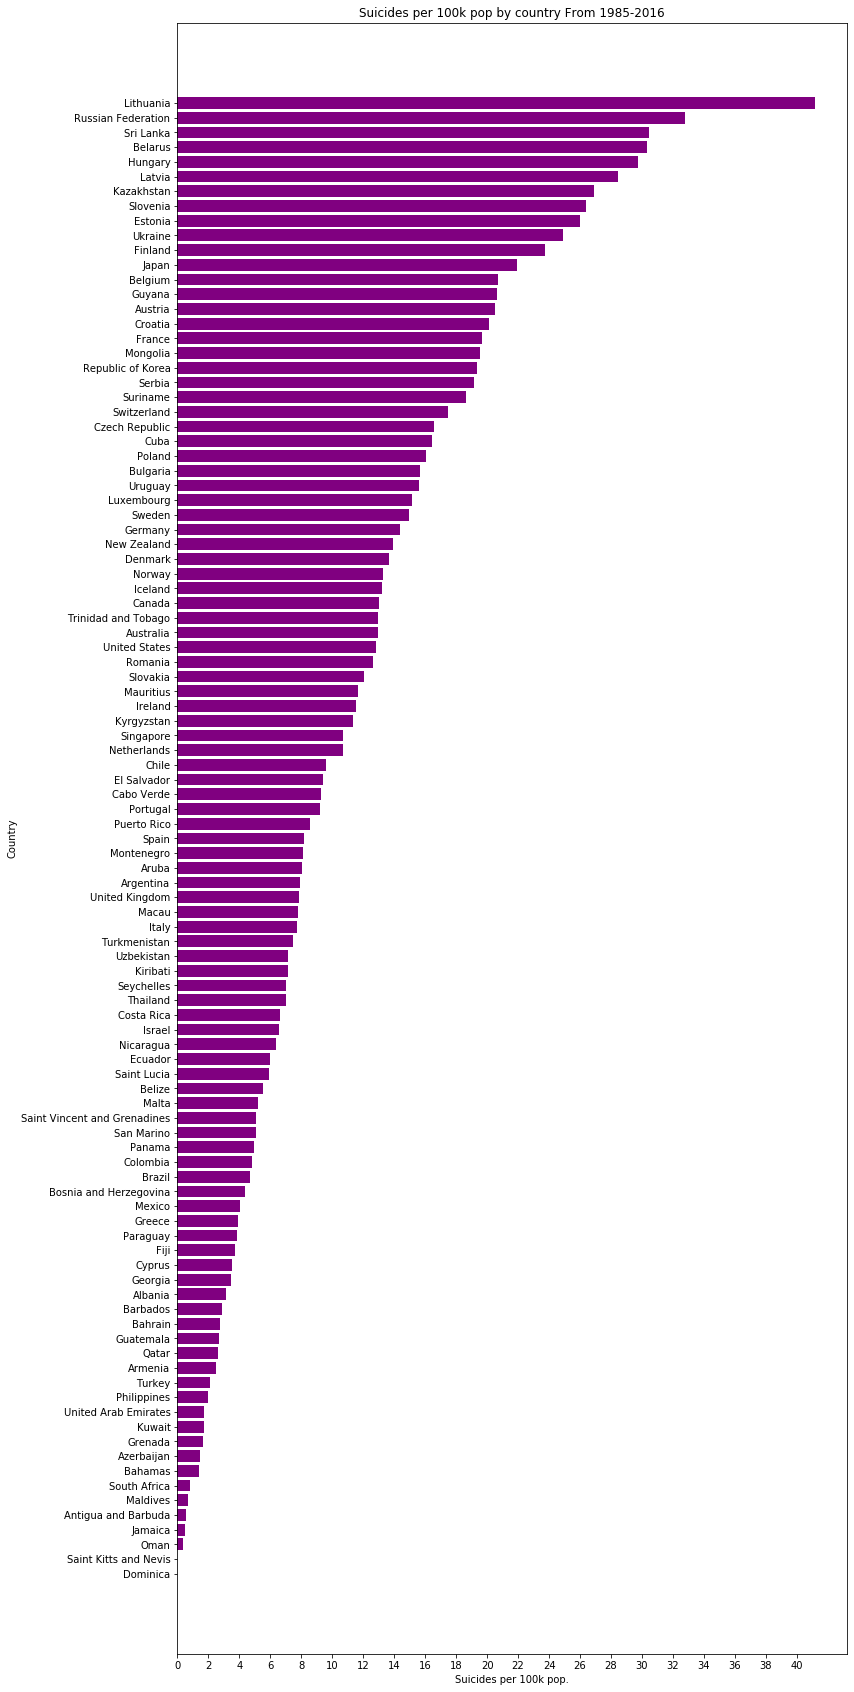

In [29]:
fig = plt.figure(figsize = (12,30))
plt.barh(country_suicides_per_100k_pop.index, country_suicides_per_100k_pop, color = 'purple')
plt.xlabel('Suicides per 100k pop.')
plt.xticks(range(0,42,2))
plt.ylabel('Country')
plt.title('Suicides per 100k pop by country From 1985-2016' )
plt.show()
fig.savefig('Suicides per 100k pop by country From 1985-2016')

In [30]:
male_group_country = suicide_data[suicide_data['sex'] == 'male'].groupby('country')
female_group_country = suicide_data[suicide_data['sex'] == 'female'].groupby('country')

In [31]:
male_perc_suicides_by_country = (male_group_country['suicides_no'].sum() / country_group['suicides_no'].sum())*100
female_perc_suicides_by_country = (female_group_country['suicides_no'].sum() / country_group['suicides_no'].sum())*100

In [32]:
male_perc_suicides_by_country

country
Albania                 64.822335
Antigua and Barbuda     90.909091
Argentina               77.710748
Armenia                 74.015748
Aruba                   83.168317
                          ...    
United Arab Emirates    84.244373
United Kingdom          76.106867
United States           79.323567
Uruguay                 78.535546
Uzbekistan              73.393098
Name: suicides_no, Length: 101, dtype: float64

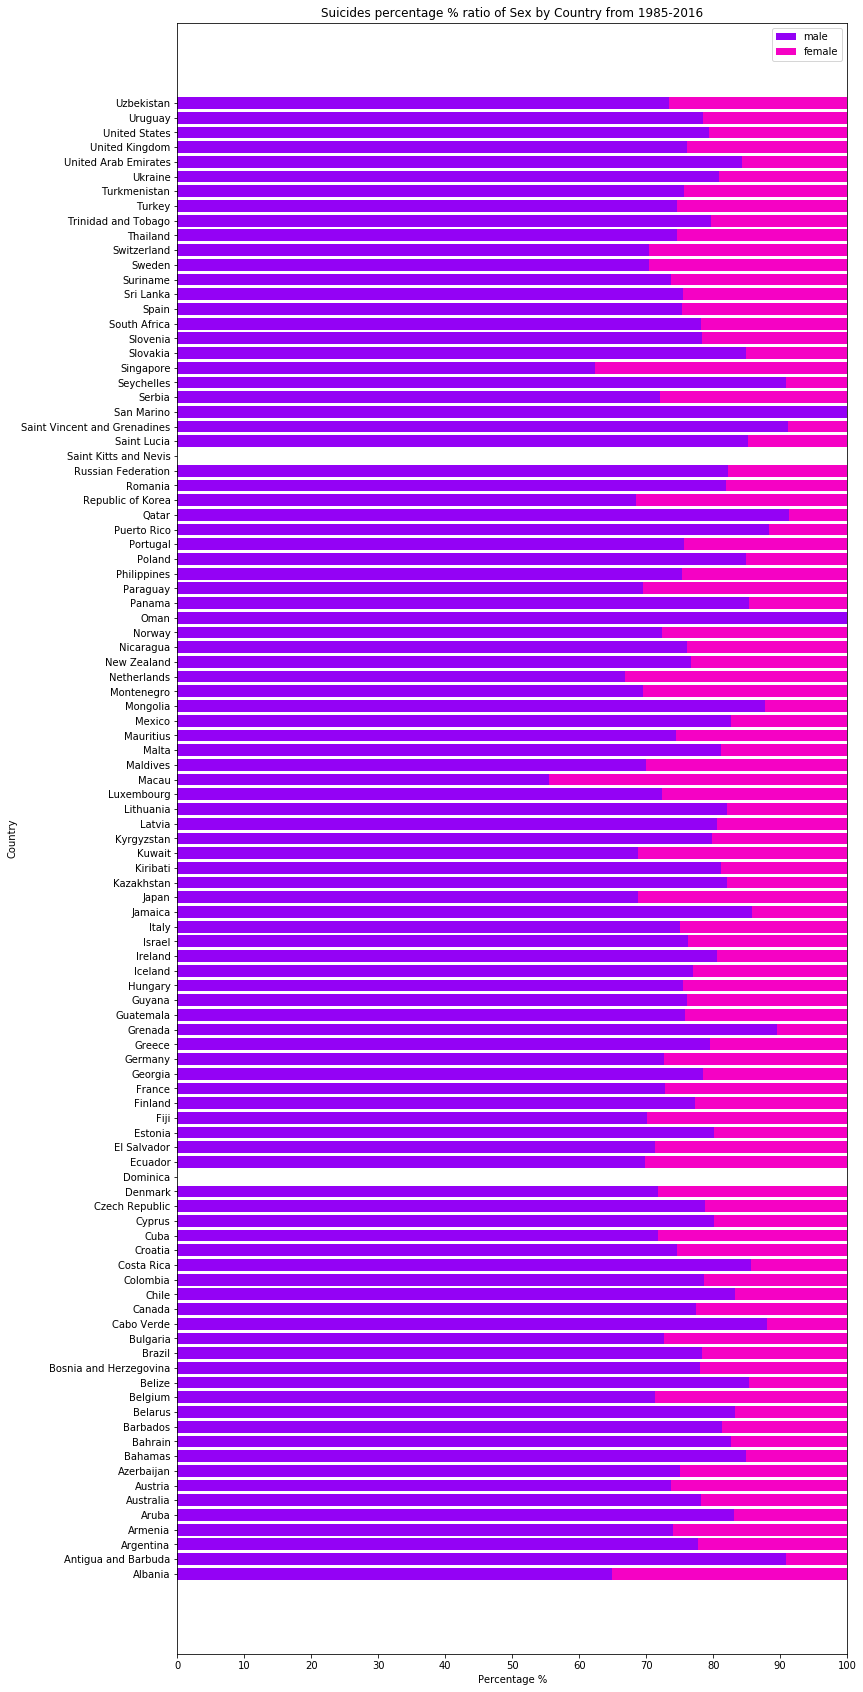

In [33]:
fig = plt.figure(figsize = (12,30))
plt.barh(male_perc_suicides_by_country.index, male_perc_suicides_by_country, color = '#9402f5', label = 'male')
plt.barh(male_perc_suicides_by_country.index, female_perc_suicides_by_country, color = '#f502c4', label = 'female', left = male_perc_suicides_by_country)
plt.xlabel('Percentage %')
plt.xticks(range(0,110,10))
plt.ylabel('Country')
plt.legend()
plt.title('Suicides percentage % ratio of Sex by Country from 1985-2016')
plt.show()
fig.savefig('Suicides percentage % ratio of Sex by Country from 1985-2016')

# My Consideration for `gdp_per_capita ($)`:
## Above 25000 as `High`, Between 5000 and 25000 as `Medium` and below 5000 as `Low`

In [34]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [35]:
suicide_data['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

In [36]:
suicide_data.loc[suicide_data['gdp_per_capita ($)'] < 5000, 'Income Category'] = 'Low'
suicide_data.loc[(suicide_data['gdp_per_capita ($)'] > 5000) & (suicide_data['gdp_per_capita ($)'] <25000), 'Income Category'] = 'Medium'
suicide_data.loc[suicide_data['gdp_per_capita ($)'] > 25000, 'Income Category'] = 'High'

In [37]:
suicide_data['Income Category'].value_counts()

Medium    11168
Low        9740
High       6912
Name: Income Category, dtype: int64

In [38]:
suicide_data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Income Category
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Low
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Low
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Low
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Low
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers,Low


In [39]:
income_group = suicide_data.groupby('Income Category')

In [40]:
income_perc_suicides = round((income_group['suicides_no'].sum() / suicide_data['suicides_no'].sum())*100,1)

In [41]:
income_perc_suicides

Income Category
High      39.7
Low       29.2
Medium    31.1
Name: suicides_no, dtype: float64

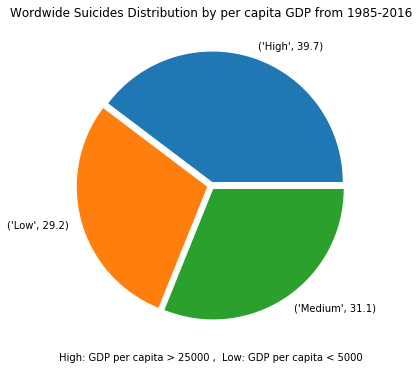

In [42]:
fig = plt.figure(figsize = (12,6))
plt.pie(income_perc_suicides, explode = (.03,.03,.03), labels= list(zip(income_perc_suicides.index,income_perc_suicides)))
plt.title('Wordwide Suicides Distribution by per capita GDP from 1985-2016')
plt.xlabel("High: GDP per capita > 25000 ,  Low: GDP per capita < 5000")
plt.show()
fig.savefig('Wordwide Suicides Distribution by per capita GDP from 1985-2016')